## Importing Libraries for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Importing my Data, Preliminary EDA, cleaning and checking Integrity of Data

In [2]:
df = pd.read_csv("../Data/cleaned_jumia_phones_data.csv")
df.head()

,delivery_type,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
0,Jumia Nigeria,880000.0,Average,150,Cryztal accessories,Excellent,86,Excellent,8 units left,0,iphone 12 pro max
1,Jumia Nigeria,1950000.0,Good,2127,Lamisol gadgets,Excellent,94,Excellent,In stock,0,iphone 15 pro max
2,Jumia Express,650000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,3,iphone 12 pro
3,Jumia Global,54267.5,No Rating yet,20,Figer,No score,98,Excellent,In stock,0,iphone 5
4,Jumia Express,400000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,0,iphone x


In [3]:
df.shape

(281, 11)

In [4]:
df.describe(include="all")

,delivery_type,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
count,281,2.810000e+02,281,281.000000,281,281,281.000000,281,281,281.000000,281
unique,3,NaN,5,NaN,26,3,NaN,5,10,NaN,21
top,Jumia Nigeria,NaN,No Rating yet,NaN,Best class stores,Excellent,NaN,Excellent,In stock,NaN,iphone x
freq,174,NaN,120,NaN,38,189,NaN,128,171,NaN,37
mean,NaN,8.363313e+05,NaN,444.540925,NaN,NaN,75.224199,NaN,NaN,0.555160,NaN
std,NaN,5.555038e+05,NaN,697.404990,NaN,NaN,17.666239,NaN,NaN,1.580455,NaN
min,NaN,5.067400e+04,NaN,0.000000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN
25%,NaN,4.522230e+05,NaN,7.000000,NaN,NaN,60.000000,NaN,NaN,0.000000,NaN
50%,NaN,7.600000e+05,NaN,183.000000,NaN,NaN,86.000000,NaN,NaN,0.000000,NaN
75%,NaN,9.800000e+05,NaN,582.000000,NaN,NaN,86.000000,NaN,NaN,0.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   delivery_type           281 non-null    object 
 1   phone_price             281 non-null    float64
 2   seller_customer_rating  281 non-null    object 
 3   seller_followers        281 non-null    int64  
 4   seller_name             281 non-null    object 
 5   seller_quality_score    281 non-null    object 
 6   seller_score            281 non-null    int64  
 7   seller_shipping_speed   281 non-null    object 
 8   units_left              281 non-null    object 
 9   verified_ratings        281 non-null    int64  
 10  model_names             281 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 24.3+ KB


In [6]:
print(f" There are {df.duplicated().sum()} duplicated rows")

 There are 5 duplicated rows


In [7]:
df[df.duplicated(keep=False)]

,delivery_type,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
78,Jumia Nigeria,1299999.0,Good,2418,Apple authorized reseller,Excellent,86,Good,2 units left,0,iphone 14
125,Jumia Global,257682.0,No Rating yet,15,Xinheng,Excellent,90,Good,In stock,0,iphone 8
129,Jumia Global,191128.0,No Rating yet,7,Huajie,Excellent,60,Excellent,In stock,0,iphone 7
135,Jumia Global,281573.0,No Rating yet,7,Huajie,Excellent,60,Excellent,In stock,0,iphone 8
141,Jumia Global,257682.0,No Rating yet,15,Xinheng,Excellent,90,Good,In stock,0,iphone 8
147,Jumia Nigeria,559999.0,No Rating yet,4,Simple gadget,No score,60,No Rating yet,In stock,0,iphone 11
153,Jumia Global,191128.0,No Rating yet,7,Huajie,Excellent,60,Excellent,In stock,0,iphone 7
192,Jumia Nigeria,559999.0,No Rating yet,4,Simple gadget,No score,60,No Rating yet,In stock,0,iphone 11
222,Jumia Nigeria,1299999.0,Good,2418,Apple authorized reseller,Excellent,86,Good,2 units left,0,iphone 14
262,Jumia Global,281573.0,No Rating yet,7,Huajie,Excellent,60,Excellent,In stock,0,iphone 8


In [8]:
# Let's drop the duplicates rows
df = df.drop_duplicates()

In [9]:
df.shape

(276, 11)

In [10]:
print(f" There are {df.duplicated().sum()} duplicated rows")

 There are 0 duplicated rows


# Which iPhone models (and the quantity) do we currently have listed on Jumia ?

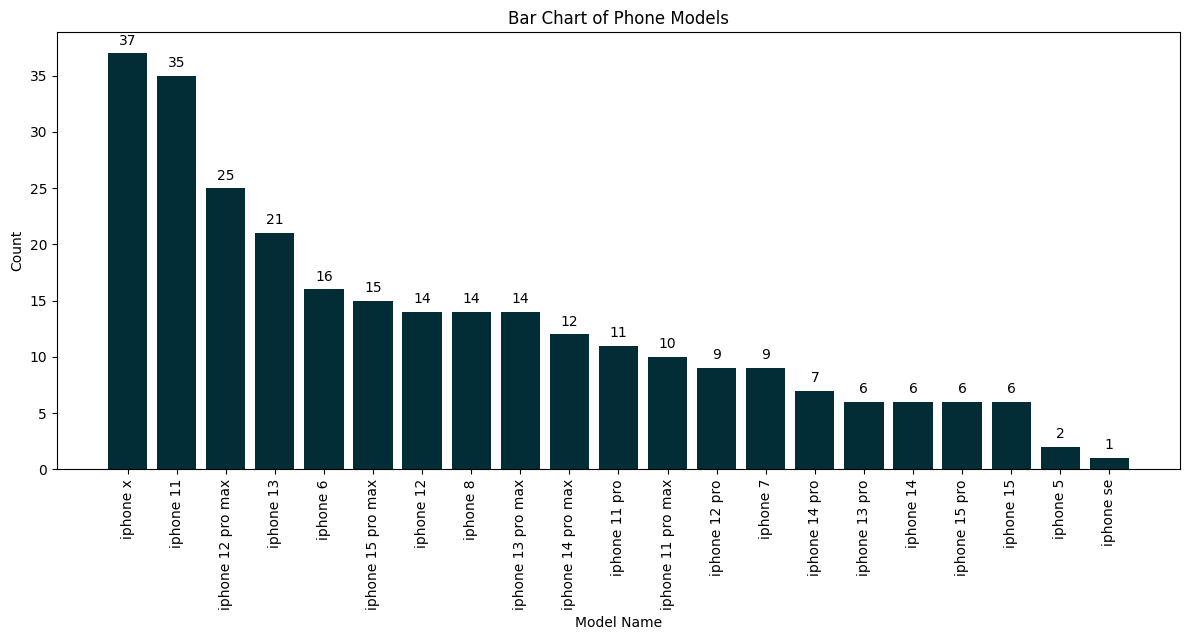

In [11]:
# Group the data by phone_name and count the number of occurrences for each phone
phone_name_counts = df['model_names'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6.5))
bars = plt.bar(phone_name_counts.index, phone_name_counts.values, color='#022d36')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.title('Bar Chart of Phone Models')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##**Analysis of iPhone Model Distribution: Market Presence and Adoption Patterns**

Summary:
This report analyzes the distribution pattern of iPhone models on the Jumia platform across various generations, revealing significant insights into device prevalence and adoption trends. The data encompasses models ranging from the iPhone 5 series through the iPhone 15 lineup, providing a comprehensive view of the iPhone ecosystem. Worthy of note is the fact that almost all generattions of iPhone (not yet obsolete) are listed/represented on the jumia platform

Analysis:

1. Market Leadership and Legacy Models
The iPhone X demonstrates remarkable market presence, leading all models with 37 units. This is closely followed by the iPhone 11 at 35 units, suggesting strong user retention of these older generation devices. The sustained presence of these models indicates:
- Robust build quality supporting long-term usage
- Strong value proposition of these particular models
- Possible price-performance advantage over newer models

2. Generational Distribution Patterns
A clear descending trend is observed across generations:
- iPhone X/11 generation: 72 combined units
- iPhone 12 series: ~53 combined units across variants
- iPhone 13 series: ~44 combined units across variants
- iPhone 14 series: ~19 combined units across variants
- iPhone 15 series: ~15 combined units across variants

3. Pro vs Standard Model Analysis
Within each generation, interesting patterns emerge in the Pro/Standard variant distribution:
- Pro Max variants typically show higher numbers than standard Pro models
- The iPhone 12 Pro Max leads its generation with 25 units
- Pro variants maintain consistent presence across generations, suggesting strong appeal among premium users

4. Recent Model Adoption
The iPhone 15 series shows lower numbers, which is expected given:
- Recent market introduction
- Higher price points of newer models
- Natural adoption curve for premium technology
- Market maturity and longer replacement cycles

5. Market Implications
Several key insights can be drawn:
- Users demonstrate strong loyalty to certain model generations
- Older models maintain significant market presence
- Premium variants (Pro/Pro Max) show consistent adoption rates
- The gradual decline in numbers for newer models suggests measured upgrade patterns

Conclusions:
The distribution pattern reveals a market characterized by:
1. Strong retention of established models
2. Gradual adoption of newer generations
3. Consistent presence of premium variants
4. Extended lifecycle of older generation devices

#Regular vs Pro Models vs Pro Max

In [12]:
df['model_names'].unique()

array(['iphone 12 pro max', 'iphone 15 pro max', 'iphone 12 pro',
       'iphone 5', 'iphone x', 'iphone 6', 'iphone 13',
       'iphone 11 pro max', 'iphone 14 pro max', 'iphone 13 pro max',
       'iphone 11', 'iphone 13 pro', 'iphone 12', 'iphone 14',
       'iphone 11 pro', 'iphone 14 pro', 'iphone 15 pro', 'iphone 15',
       'iphone 7', 'iphone 8', 'iphone se'], dtype=object)

In [13]:
# Categorize models
categories = {
    'Regular': [model for model in df['model_names'] if 'pro' not in model],
    'Pro': [model for model in df['model_names'] if 'pro max' not in model and 'pro' in model],
    'Pro Max': [model for model in df['model_names'] if 'pro max' in model]
}

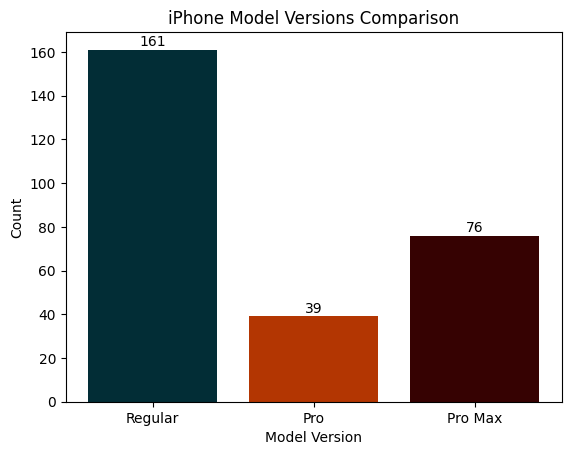

In [14]:
counts = [len(categories['Regular']), len(categories['Pro']), len(categories['Pro Max'])]

# Create the bar chart
plt.bar(['Regular', 'Pro', 'Pro Max'], counts, color=['#022d36', '#b33602', '#360202'])
plt.title('iPhone Model Versions Comparison')
plt.xlabel('Model Version')
plt.ylabel('Count')

# Add labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

## **Analysis of iPhone Model Distribution Across Variants on the Jumia Platform**

**Summary**:
The bar chart presents the distribution of iPhone models across three variants: Regular, Pro, and Pro Max. The data reveals a significant disparity in counts between the base model and its premium counterparts.

**Key Findings:**

**Model Distribution**:

* Regular iPhone models dominate the distribution with 161 units
* Pro Max variants follow with 76 units
* Pro models show the lowest representation at 39 units


**Market Positioning Analysis**:

* The Regular variant accounts for approximately 58.3% of the total units
* Premium models (Pro and Pro Max combined) represent 41.7% of the distribution
* The Pro Max variant however shows nearly double the count of the standard Pro model


**Notable Patterns**:

* A clear seller preference for the entry-level Regular model is evident which may infact be reflective of demand
* Among premium options, there is a stronger inclination toward the Pro Max variant
* The standard Pro model shows the lowest adoption rate



**Implications**:
The distribution pattern suggests that while the Regular iPhone model maintains broad market appeal, there exists a substantial market for premium variants, particularly the Pro Max model. The lower representation of the standard Pro model might indicate that consumers who opt for premium features tend to prefer the maximum specifications offered by the Pro Max (Assuming listing reflect demand).

**Conclusion**:
This data visualization effectively illustrates the market segmentation of iPhone models on the Jumia Platform, with a clear dominance of the Regular variant while maintaining a significant presence in the premium segment through the Pro Max model.


In [15]:
def plot_iphone_distribution(df):
    """
    Create a bar chart showing the distribution of iPhone models with custom colors

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'model_names' column
    """
    # Extract main model (e.g., iPhone 12, iPhone 13)
    df['main_model'] = df['model_names'].str.extract(r'(iphone (?:\d+|x|se))', flags=re.IGNORECASE)

    # Create categories for Pro, Pro Max, and Regular
    df['category'] = 'Regular'  # Default category
    df.loc[df['model_names'].str.contains('pro max', flags=re.IGNORECASE), 'category'] = 'Pro Max'
    df.loc[df['model_names'].str.contains('pro', flags=re.IGNORECASE) &
           ~df['model_names'].str.contains('pro max', flags=re.IGNORECASE), 'category'] = 'Pro'

    # Group and count
    model_counts = df.groupby(['main_model', 'category'])['model_names'].count().unstack(fill_value=0)

    # Set up the colors
    colors = {
        'Pro': '#b33602',
        'Pro Max': '#360202',
        'Regular': '#022d36'
    }

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars
    bar_width = 0.25
    index = np.arange(len(model_counts))

    # Ensure all categories exist in the DataFrame
    for category in ['Regular', 'Pro', 'Pro Max']:
        if category not in model_counts.columns:
            model_counts[category] = 0

    # Plot each category
    bars = []
    x_positions = index - bar_width

    for i, category in enumerate(['Regular', 'Pro', 'Pro Max']):
        position = x_positions + (i * bar_width)
        bars.append(ax.bar(position,
                          model_counts[category],
                          bar_width,
                          label=category,
                          color=colors[category]))

    # Customize the plot
    ax.set_xlabel('iPhone Models')
    ax.set_ylabel('Count')
    ax.set_title('iPhone Model Category Distribution')
    ax.set_xticks(index)
    ax.set_xticklabels(model_counts.index, rotation=45, ha='right')
    ax.legend(title='Category')

    # Add value labels
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only add label if bar has height
                ax.text(bar.get_x() + bar.get_width()/2.,
                       height,
                       f'{int(height)}',
                       ha='center', va='bottom')

    # Add labels to all bars
    for bar_group in bars:
        add_value_labels(bar_group)

    plt.tight_layout()
    return fig

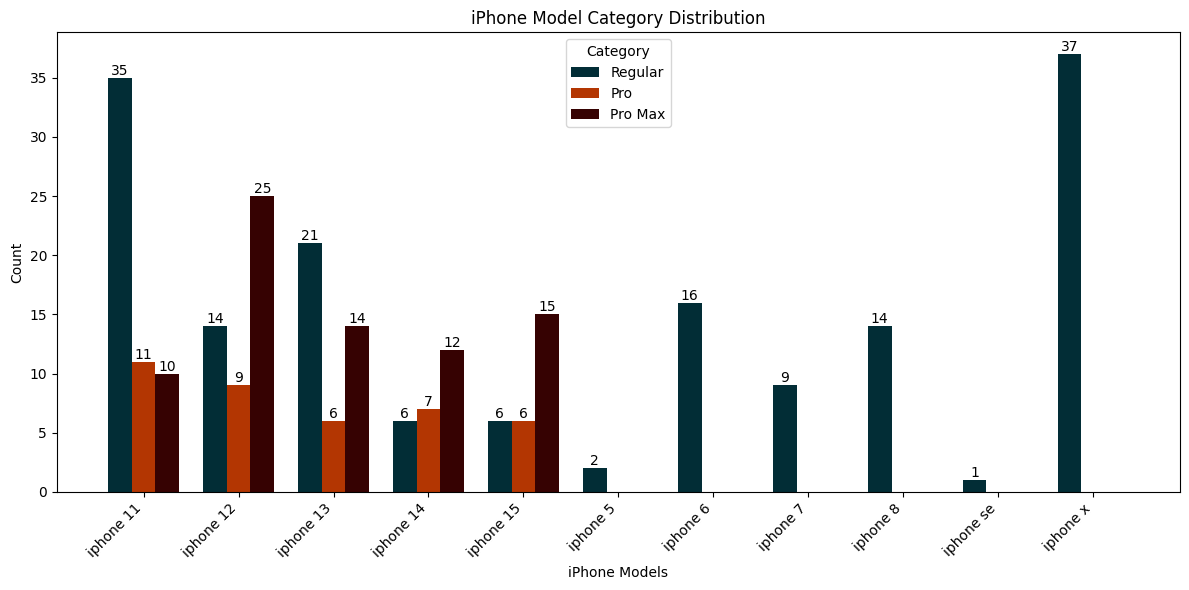

In [16]:
fig = plot_iphone_distribution(df)
plt.show()

## **Analysis of iPhone Model Distribution Across Categories**


**Model Distribution**


The iPhone X and iPhone 11 show the highest unit counts, with 37 and 35 units respectively in the Regular category
The iPhone 12 demonstrates the strongest presence in the Pro Max category with 25 units
Pro variants consistently maintain lower numbers compared to Regular models, suggesting a targeted premium market strategy


**Category Patterns**


Regular Models: Maintain the highest representation across most generations
Pro Models: Show moderate distribution, typically ranging from 6-11 units
Pro Max Models: Display significant variation, peaking at 25 units for iPhone 12


Generational Trends


Recent Models (iPhone 11-15): Show a more diverse category split
Mid-Generation Models (iPhone 6-8): Exclusively offered in Regular variants
Legacy Models (iPhone 5, SE): Have minimal representation

Notable Observations:

* The data suggests a strategic shift towards category diversification in newer generations
* iPhone 11 series shows balanced distribution across all three categories
* iPhone X maintains strong numbers despite being an older model

**Conclusion**:
The Regular variants maintain consistent popularity, while Pro and Pro Max models cater to specific market segments, showing varying degrees of adoption across different generations.

# Popularity vs Average Price
Let us further analyze the data to determine if there are any patterns in the popularity of certain models based on price as a factor

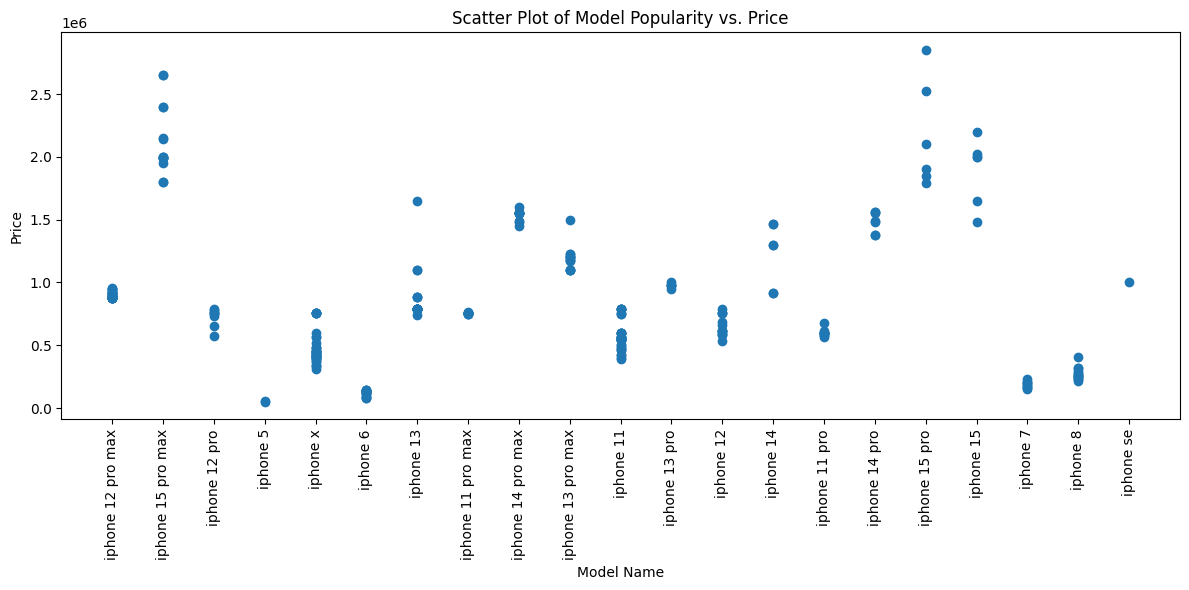

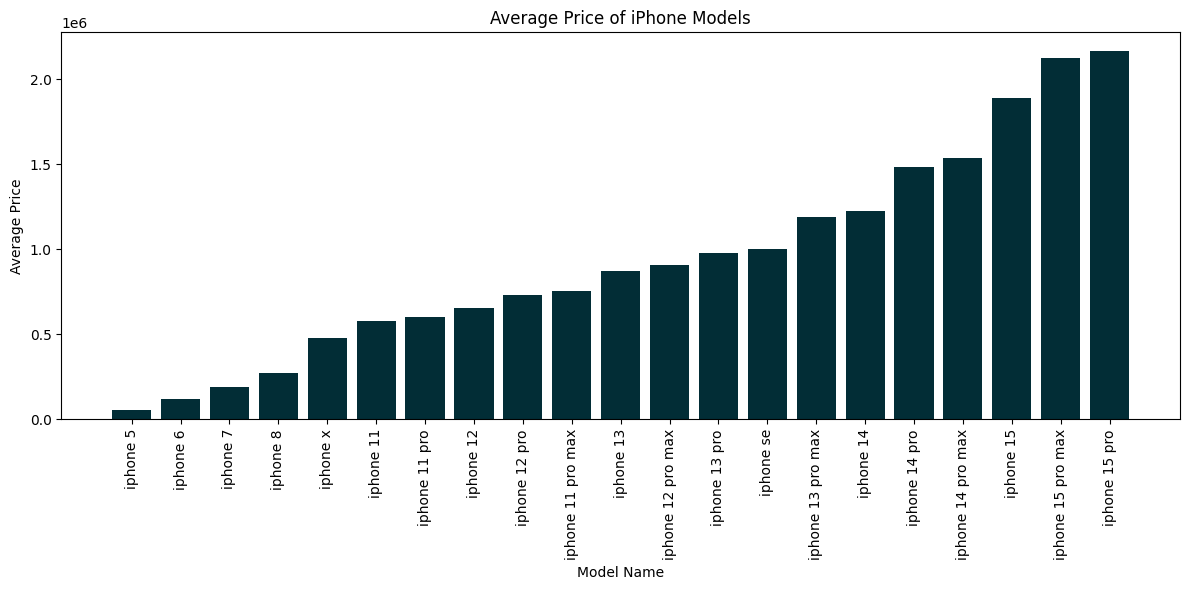

In [17]:
# Group by model and calculate average price
model_prices = df.groupby('model_names')['phone_price'].mean().sort_values()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['model_names'], df['phone_price'])
plt.xlabel('Model Name')
plt.ylabel('Price')
plt.title('Scatter Plot of Model Popularity vs. Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_prices.index, model_prices.values, color='#022d36')
plt.xlabel('Model Name')
plt.ylabel('Average Price')
plt.title('Average Price of iPhone Models')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## **Average Price of iPhone Models**

The bar chart titled "Average Price of iPhone Models" illustrates the average price of various iPhone models listed on Jumia.

***Key Observations***:

* **Average Price vs Model**:
Average price of the model increases as the model increases (Newer models are more expensive than older models)

* ***Price Range***: iPhone prices on Jumia vary significantly by model.

* **Most Expensive**: The iPhone 15 Pro, iPhone 15 pro max, iPhone 15, iPhone14 Pro and iPhone 14 generally command the highest average prices, reflecting their newer releases and premium features.

* **Mid-Range**: iPhones like the iPhone 13, 13 Pro, 12 Pro, and 11 Pro Max fall within a mid-range price bracket.

* **Least Expensive**: Older models, such as the iPhone X, iPhone 8, iPhone 7, iPhone 6 and iPhone 5, tend to have the lowest average prices.

**Price-Model Correlation**: There is a general trend of newer models having higher average prices, while older models are more affordable.





**NOTE**: There is only one iPhone se listed. Hence its position on the chart

# iPhone Model Frequency and Average Price

<ipython-input-18-7961d83735a6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_frequency.index, rotation=90)


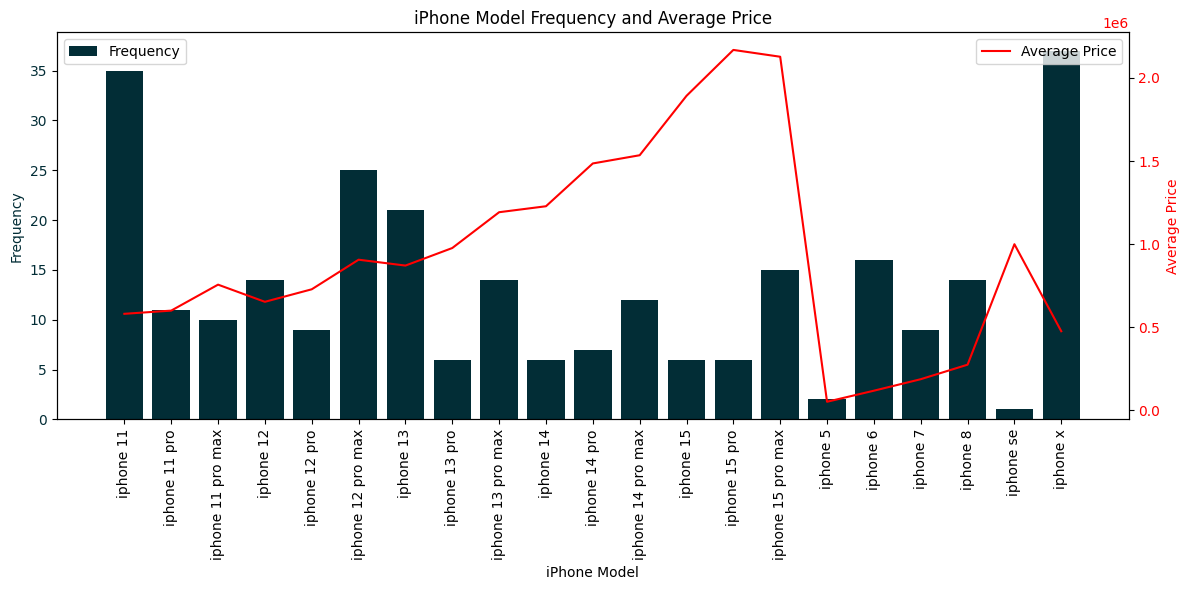

In [18]:
# Calculate frequency and average price
model_frequency = df['model_names'].value_counts().sort_index()  # Ensure sorted indexes
model_avg_price = df.groupby('model_names')['phone_price'].mean().sort_index()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequency
ax1.bar(model_frequency.index, model_frequency.values, color='#022d36', label='Frequency')
ax1.set_xlabel('iPhone Model')
ax1.set_ylabel('Frequency', color='#022d36')
ax1.tick_params('y', labelcolor='#022d36')
ax1.set_xticklabels(model_frequency.index, rotation=90)

# Create a second y-axis for average price
ax2 = ax1.twinx()

# Line chart for average price
ax2.plot(model_avg_price.index, model_avg_price.values, color='red', label='Average Price')
ax2.set_ylabel('Average Price', color='red')
ax2.tick_params('y', labelcolor='red')

# Add title and legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('iPhone Model Frequency and Average Price')

# Ensure proper layout
plt.tight_layout()

# Show the plot
plt.show()


We see that there is little to no relationship between iPhone model and the average price. That is to say that the number of listings is not necessarily dependent on the price of the iPhone model.

However, the iPhone 11 series (iPhone 11, iPhone 11 Pro and iPhone 11 pro max), the iPhone x and the iPhone 12 series (regular, pro and pro max), have considerable price ranges and are surprisingly high in terms of listing. Maybe demand as well as seller losting is driven by both newer models (as no one wants to be seen using really old models) and affordability.

In [19]:
df.columns

Index(['delivery_type', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names', 'main_model', 'category'],
      dtype='object')

# Which store(s) has the cheapest iphones ?

In [20]:
# Group by 'model_names', sort by 'phone_price', and get the cheapest
cheapest_phones = df.groupby('model_names').apply(lambda x: x.sort_values('phone_price').iloc[0])

# Reset the index to make 'model_names' a regular column
cheapest_phones = cheapest_phones.reset_index(drop=True)

cheapest_phones['seller_name'].value_counts()

<ipython-input-20-d27c18e7726c>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cheapest_phones = df.groupby('model_names').apply(lambda x: x.sort_values('phone_price').iloc[0])


,count
seller_name,
Okcat,3
Best class stores,3
Simple gadget,2
Apple authorized reseller,2
Mobile links77,1
Yusheng,1
Bargain phones & gadget - ac,1
Unagi-cod,1
Don chris links,1


### Cheapest Phones, Price and seller name

In [21]:
cheapest_phones[['seller_name', 'phone_price', 'seller_quality_score', 'model_names']]

,seller_name,phone_price,seller_quality_score,model_names
0,Okcat,394103.0,No score,iphone 11
1,Simple gadget,569999.0,No score,iphone 11 pro
2,Mobile links77,751000.0,Excellent,iphone 11 pro max
3,Yusheng,531060.0,Excellent,iphone 12
4,Bargain phones & gadget - ac,577500.0,Excellent,iphone 12 pro
5,Simple gadget,879800.0,No score,iphone 12 pro max
6,Unagi-cod,742000.0,Very Poor,iphone 13
7,Best class stores,950000.0,Excellent,iphone 13 pro
8,Don chris links,1100000.0,Very Poor,iphone 13 pro max
9,Huajie,918097.0,Excellent,iphone 14


In [22]:
unique_sellers = cheapest_phones[['seller_name', 'seller_quality_score', 'seller_customer_rating', 'seller_score', 'seller_shipping_speed']].drop_duplicates().reset_index(drop=True)
unique_sellers

,seller_name,seller_quality_score,seller_customer_rating,seller_score,seller_shipping_speed
0,Okcat,No score,No Rating yet,60,Very Poor
1,Simple gadget,No score,No Rating yet,60,No Rating yet
2,Mobile links77,Excellent,Excellent,100,Excellent
3,Yusheng,Excellent,No Rating yet,98,Excellent
4,Bargain phones & gadget - ac,Excellent,Excellent,100,Excellent
5,Unagi-cod,Very Poor,Average,54,Excellent
6,Best class stores,Excellent,Average,86,Excellent
7,Don chris links,Very Poor,Average,46,Good
8,Huajie,Excellent,No Rating yet,60,Excellent
9,Apple authorized reseller,Excellent,Good,86,Good


The "Bargain phones & gadget - ac" store listed four (4) of the cheapest iPhones on Jumia, followed closely by the "Apple authorized reseller" with three (3) of the cheapest phones, follwed by okcat. Worthy of note however is the fact that three (3) of this sellers have no seller quality score, no rating possible because of no sales yet and the lowest seller_score- [Okcat, Simple gadget and Figer01]. While one seller (Unagi-cord) has very poor seller quality score, average seller customer rating and low seller score. Others however have excellent seller_quality_score

# Seller Analysis

In [23]:
df.head()

,delivery_type,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names,main_model,category
0,Jumia Nigeria,880000.0,Average,150,Cryztal accessories,Excellent,86,Excellent,8 units left,0,iphone 12 pro max,iphone 12,Pro Max
1,Jumia Nigeria,1950000.0,Good,2127,Lamisol gadgets,Excellent,94,Excellent,In stock,0,iphone 15 pro max,iphone 15,Pro Max
2,Jumia Express,650000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,3,iphone 12 pro,iphone 12,Pro
3,Jumia Global,54267.5,No Rating yet,20,Figer,No score,98,Excellent,In stock,0,iphone 5,iphone 5,Regular
4,Jumia Express,400000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,0,iphone x,iphone x,Regular


# Which seller has the most iPhone listings on Jumia ?

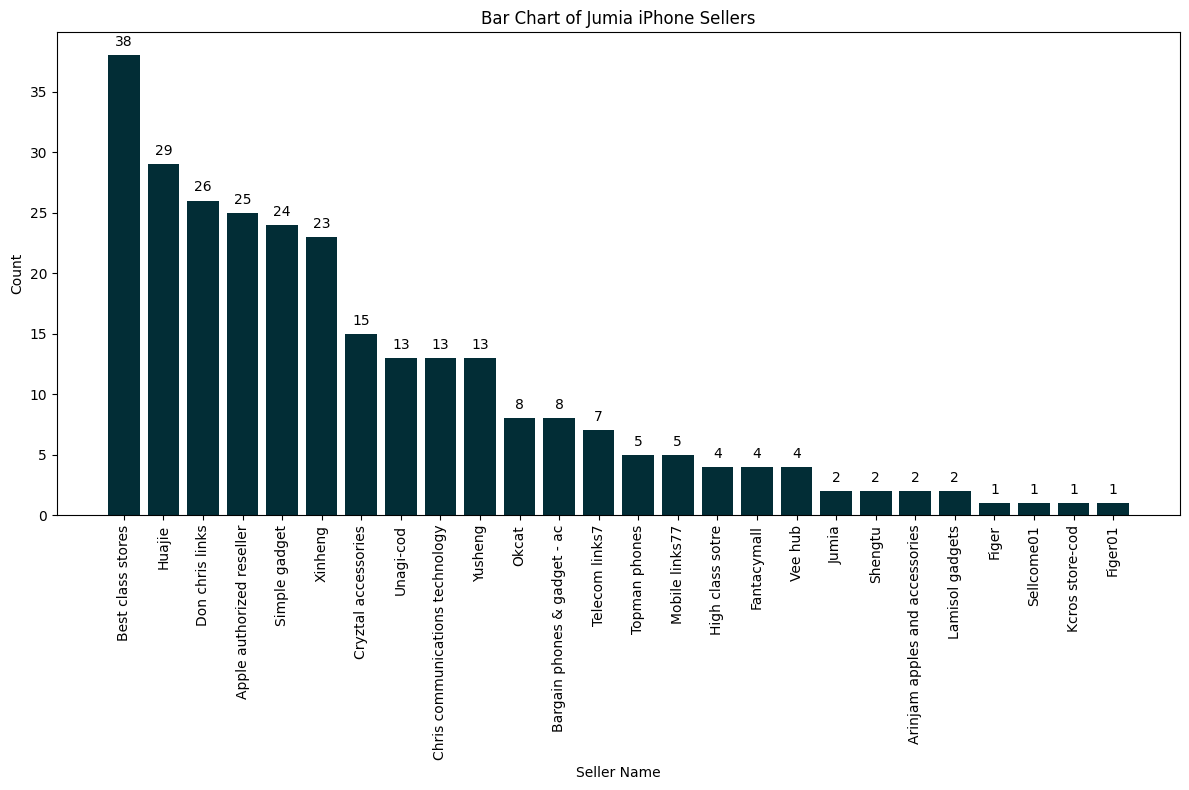

In [24]:
# Group the data by seller_name and count the number of occurrences for each phone
seller_count = df['seller_name'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(seller_count.index, seller_count.values, color='#022d36')
plt.xlabel('Seller Name')
plt.ylabel('Count')
plt.title('Bar Chart of Jumia iPhone Sellers')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar chart above presents the iPhones sellers landscape with a mix of large and small iPhone sellers. Best class stores has the most listings with over 38 iPhone listings on Jumia. Other sellers (Don Chris, SImple gadget, Apple authorized reseller and Xinheng) have > 20 listings. With a few more sellers having just 1 listing (Sellcome01, Kcros store, Figer and Lamisol gadgets)

In [25]:
df_seller = df[['seller_name','seller_customer_rating', 'seller_followers', 'seller_quality_score', 'seller_score', 'seller_shipping_speed' ]].drop_duplicates().reset_index(drop=True)

In [26]:
df_seller

,seller_name,seller_customer_rating,seller_followers,seller_quality_score,seller_score,seller_shipping_speed
0,Cryztal accessories,Average,150,Excellent,86,Excellent
1,Lamisol gadgets,Good,2127,Excellent,94,Excellent
2,Bargain phones & gadget - ac,Excellent,191,Excellent,100,Excellent
3,Figer,No Rating yet,20,No score,98,Excellent
4,Apple authorized reseller,Good,2418,Excellent,86,Good
5,Sellcome01,No Rating yet,7,Very Poor,60,Excellent
6,Chris communications technology,Average,881,Excellent,80,Good
7,Topman phones,No Rating yet,293,Very Poor,40,Good
8,Best class stores,Average,582,Excellent,86,Excellent
9,High class sotre,Excellent,349,Excellent,94,Good


In [27]:
df_seller.shape

(26, 6)

# Which sellers has atleast a good customer rating, excellent seller quality score  and atleast a good seller shipping speed ?

In [28]:
df_seller[df_seller['seller_customer_rating'].str.contains('Good|Excellent|Average')].reset_index(drop=True)

,seller_name,seller_customer_rating,seller_followers,seller_quality_score,seller_score,seller_shipping_speed
0,Cryztal accessories,Average,150,Excellent,86,Excellent
1,Lamisol gadgets,Good,2127,Excellent,94,Excellent
2,Bargain phones & gadget - ac,Excellent,191,Excellent,100,Excellent
3,Apple authorized reseller,Good,2418,Excellent,86,Good
4,Chris communications technology,Average,881,Excellent,80,Good
5,Best class stores,Average,582,Excellent,86,Excellent
6,High class sotre,Excellent,349,Excellent,94,Good
7,Unagi-cod,Average,203,Very Poor,54,Excellent
8,Don chris links,Average,309,Very Poor,46,Good
9,Mobile links77,Excellent,751,Excellent,100,Excellent


Just eight (12) out of the 26 iphone sellers (~46%) met this criteria.

# What are the top seller by followers on Jumia ?

In [29]:
df_seller.sort_values('seller_followers', ascending=False).reset_index(drop=True)

,seller_name,seller_customer_rating,seller_followers,seller_quality_score,seller_score,seller_shipping_speed
0,Apple authorized reseller,Good,2418,Excellent,86,Good
1,Lamisol gadgets,Good,2127,Excellent,94,Excellent
2,Chris communications technology,Average,881,Excellent,80,Good
3,Mobile links77,Excellent,751,Excellent,100,Excellent
4,Best class stores,Average,582,Excellent,86,Excellent
5,High class sotre,Excellent,349,Excellent,94,Good
6,Don chris links,Average,309,Very Poor,46,Good
7,Topman phones,No Rating yet,293,Very Poor,40,Good
8,Unagi-cod,Average,203,Very Poor,54,Excellent
9,Bargain phones & gadget - ac,Excellent,191,Excellent,100,Excellent


The top six sellers by followers all have excellent quality score and atleast a good seller shipping score. With the exception of Best class store with a customer raiting of poor, the top six all have a minmum customer rating score of average.

The bottom three sellers have no followers and no customer rating

# Seller Customer Rating Score

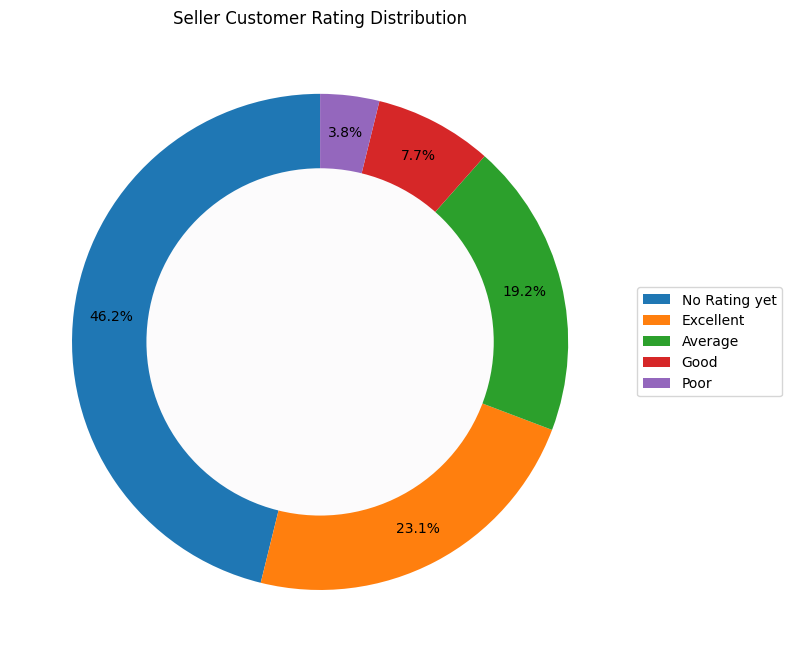

In [30]:
# Calculate the value counts for 'seller_customer_rating'
seller_customer_rating_counts = df_seller['seller_customer_rating'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(seller_customer_rating_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='#fcfbfc')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Add labels outside the chart
plt.legend(seller_customer_rating_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Seller Customer Rating Distribution')
plt.tight_layout()
plt.show()

### **Seller Customer Rating Distribution Analysis Report**
**Summary**:
This analysis examines the distribution of customer ratings across iPhone sellers on Jumia, revealing insights into seller performance and rating patterns. The data shows that while a substantial portion of sellers remain unrated, those who have received ratings demonstrate varying levels of performance.

**Key Findings**:

**Rating Coverage**


* 46.2% of sellers have not yet received any ratings, representing the largest segment
* 53.8% of sellers have received customer ratings, providing a substantial sample for analysis


**Performance Breakdown**
Among rated sellers:


* 23.1% achieved "Excellent" ratings
* 19.2% received "Average" ratings
* 7.7% obtained "Good" ratings
* 3.8% received "Poor" ratings


**Performance Analysis**

**Positive Indicators**:


* Combined "Excellent" and "Good" ratings account for 30.8% of all sellers
* "Excellent" ratings represent the highest proportion among rated sellers
* The relatively low percentage of "Poor" ratings (3.8%) suggests generally satisfactory service levels

**Areas of Concern**:

The high proportion of unrated sellers (46.2%) may indicate:

* New sellers entering the marketplace
* Low customer engagement in the rating system
* Potential missed opportunities for feedback collection



**Recommendations**:

**Rating System Enhancement**:


* Implement strategies to increase rating participation
* Consider automated follow-up mechanisms to encourage customer feedback
* Develop incentives for customers to provide ratings


Seller Development:

* Create targeted training programs based on rating categories


**Conclusion**:
While the current rating distribution shows promising signs with a significant portion of "Excellent" ratings, there is substantial room for improvement in rating system participation and overall seller performance. The high percentage of unrated sellers presents both a challenge and an opportunity for system-wide enhancement.

#Seller Quality Score Distribution

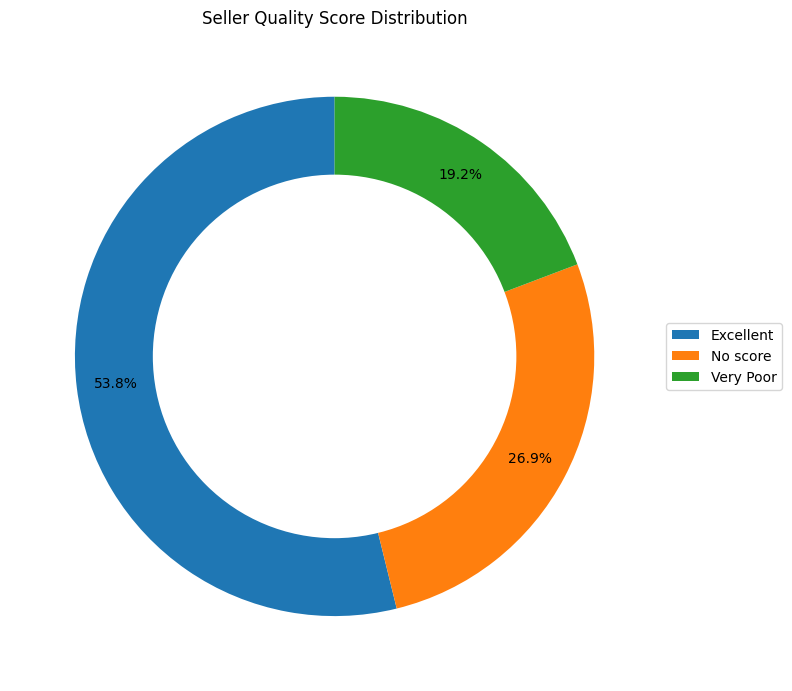

In [31]:
# Calculate value counts for 'seller_quality_score'
seller_quality_score_counts = df_seller['seller_quality_score'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(seller_quality_score_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add labels outside the chart
plt.legend(seller_quality_score_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Seller Quality Score Distribution')
plt.tight_layout()
plt.show()

### Seller Quality Score Distribution Analysis Report
**Executive Summary:**
The pie chart presents the distribution of seller quality scores across three distinct categories. The chart reveals that more than half of sellers maintain excellent performance ratings, while a significant portion either lack scores or perform poorly.

**Key Findings**:

**Dominant Excellence (53.8%):**

* The majority of sellers (53.8%) have achieved an "Excellent" quality score
* This represents a strong foundation of high-performing sellers within the marketplace


**Scoring Gap (26.9%):**

* Approximately one-quarter (26.9%) of sellers have "No score"
* This indicates a substantial segment of unrated or potentially new sellers
* Presents an opportunity for quality assessment implementation


**Performance Concerns (19.2%):**

* Nearly one-fifth (19.2%) of sellers are classified as "Very Poor"
* This suggests a significant portion requiring intervention or support

Analysis:
The distribution reveals a polarized seller landscape:

The high proportion of excellent scores (53.8%) suggests robust quality control measures and seller commitment to performance standards
The considerable percentage of unscored sellers (26.9%) may indicate either:

* A significant influx of new sellers
* Gaps in the scoring system implementation
* Inactive or intermittent sellers


The very poor performers (19.2%) represent an area requiring immediate attention


# Seller Shipping Speed Distribution

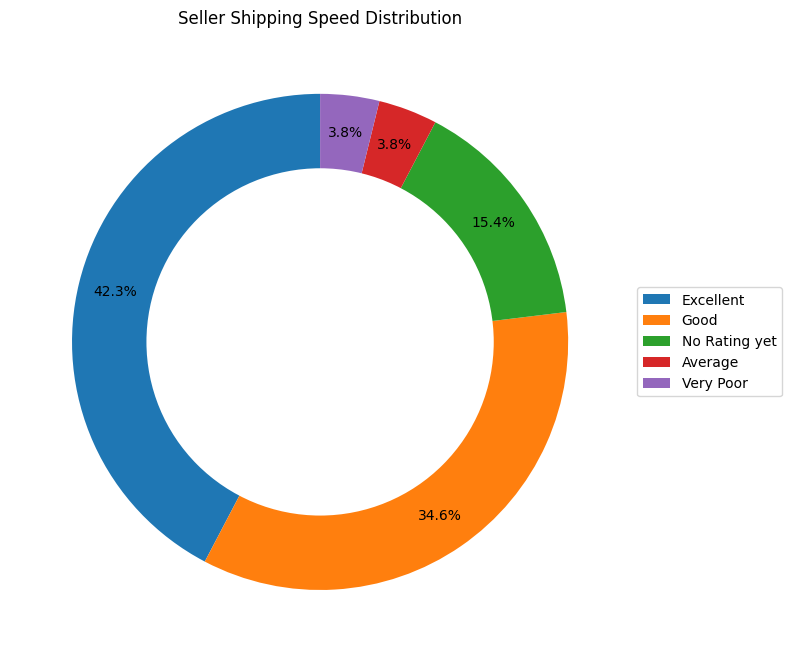

In [32]:
# Calculate value counts for 'seller_shipping_speed'
seller_shipping_speed_counts = df_seller['seller_shipping_speed'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(seller_shipping_speed_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add labels outside the chart
plt.legend(seller_shipping_speed_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Seller Shipping Speed Distribution')
plt.tight_layout()
plt.show()

### Seller Shipping Speed Performance Analysis Report
**Summary**:
The analysis of seller shipping speed distribution reveals that a significant majority (76.9%) of sellers demonstrate strong shipping performance, with ratings falling in the "Excellent" to "Good" categories. However, there are notable opportunities for improvement across the remaining segments.

**Analysis**:

* Excellent Performance: 42.3% of sellers achieve excellent shipping speeds, representing the largest segment
* Good Performance: 34.6% maintain good shipping speeds, forming the second-largest category
* No Rating: 15.4% of sellers are yet to be rated
* Average Performance: 3.8% demonstrate average shipping speeds
* Very Poor Performance: 3.8% show significantly below-standard shipping speeds

**Key Insights**:

**Performance Strengths**

* More than three-quarters of rated sellers meet or exceed shipping speed expectations


**Areas of Concern**

* The combined 7.6% of sellers with average or very poor ratings requires attention
* The 15.4% unrated segment represents a significant blind spot in performance assessment